## Woman have affairs  Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `woman have affairs` using the  given data (Regression Analysis).


The dataset contains 6366 observations of 9 variables:

`rate_marriage` : woman's rating of her marriage (1 = very poor, 5 =very good)

`age` : woman&'s age
`yrs_married`: number of years married
`children` : number of children
`religious` : woman's rating of how religious she is (1 = not religious,4 =strongly religious)
`educ` : level of education (9 = grade school, 12 = high school, 14 =some college, 16 = college graduate, 17 = some graduate school,20= advanced degree)


`occupation` : woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

`occupation_husb`: husband&'s occupation (same coding as above) 


Target variable:
* `affairs`: time spent in extra-marital affairs

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn import metrics 
import os
# Rest of your code


In [4]:
## Data Ingestions step
dta = sm.datasets.fair.load_pandas().data
# Get the user's home directory
home_dir = os.path.expanduser(r"C:\Users\atulk\PycharmProjects\pythonProject2\M_L\Project_4\notebooks\data")

# Define the file path for the CSV file
file_path = os.path.join(home_dir, "data_file.csv")

# Save the DataFrame to a CSV file with the specified file path
dta.to_csv(file_path, index=False)

In [5]:
## Data Ingestions step
df=pd.read_csv('data/data_file.csv')
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
df['occupation'].unique()

array([2., 3., 5., 4., 1., 6.])

In [185]:


# Add "affair" column: 1 represents having affairs, 0 represents not
df['affair'] = (df.affairs > 0).astype(int)

y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
                 df, return_type="dataframe")

X = X.rename(columns={'C(occupation)[T.2.0]': 'occ_2',
                      'C(occupation)[T.3.0]': 'occ_3',
                      'C(occupation)[T.4.0]': 'occ_4',
                      'C(occupation)[T.5.0]': 'occ_5',
                      'C(occupation)[T.6.0]': 'occ_6',
                      'C(occupation_husb)[T.2.0]': 'occ_husb_2',
                      'C(occupation_husb)[T.3.0]': 'occ_husb_3',
                      'C(occupation_husb)[T.4.0]': 'occ_husb_4',
                      'C(occupation_husb)[T.5.0]': 'occ_husb_5',
                      'C(occupation_husb)[T.6.0]': 'occ_husb_6'})

y = np.ravel(y)

In [186]:
# check for null value 
X.isnull().sum()
# No missing values present in the data

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
dtype: int64

In [187]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6366 entries, 0 to 6365
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Intercept      6366 non-null   float64
 1   occ_2          6366 non-null   float64
 2   occ_3          6366 non-null   float64
 3   occ_4          6366 non-null   float64
 4   occ_5          6366 non-null   float64
 5   occ_6          6366 non-null   float64
 6   occ_husb_2     6366 non-null   float64
 7   occ_husb_3     6366 non-null   float64
 8   occ_husb_4     6366 non-null   float64
 9   occ_husb_5     6366 non-null   float64
 10  occ_husb_6     6366 non-null   float64
 11  rate_marriage  6366 non-null   float64
 12  age            6366 non-null   float64
 13  yrs_married    6366 non-null   float64
 14  children       6366 non-null   float64
 15  religious      6366 non-null   float64
 16  educ           6366 non-null   float64
dtypes: float64(17)
memory usage: 895.2 KB


In [188]:
## check for duplicated value records
X.duplicated().sum()

1537

In [189]:
## Dealing  with duplicated values
X=X.drop_duplicates()

In [190]:
## check for duplicated value Again
X.duplicated().sum()

0

In [191]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6358,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,27.0,6.0,2.0,4.0,14.0
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [192]:
## segregate numerical and categorical columns

numerical_columns=X.columns[X.dtypes!='object']
categorical_columns=X.columns[X.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


In [193]:
from PIL import Image



class Information_about_single_column:
    """This class provides methods to generate descriptive statistics, count information, and create a pie chart for a single column of data.
    """
    def __init__(self,data,name):
        self.data=data
        self.name=name

    def Description(self):
       """Description(): Generates and prints the descriptive statistics of the column."""
       s =self.data.describe()
       return print(f'Description : {self.name}\n{s}')


    def Count(self):
        """Count(): Prints the count and percentage of each unique value in the column."""
        value_count=self.data.value_counts()
        value_count_norm = self.data.value_counts(normalize=True)*100
        value_count_norm_1= pd.concat([value_count, value_count_norm], axis=1)

        return print(f"Count : {self.name}{value_count_norm_1}")
    
    def create_pie_plot(self):
        """create_pie_plot(): Creates and displays a pie chart to visualize the distribution of values in the column."""

        pie_chart = self.data.value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%')
        plt.axis('equal')  # Set the pie chart to be circular
        plt.show()  # Show the chart
        return  pie_chart
    def Total_Information(self):
        """The Total_Information() method combines the above methods to provide a comprehensive summary of the column."""
        print(self.Description())
        print('-'*50)
        print(self.Count())
        print('-'*50)
        print(self.create_pie_plot())
        print('\n')


Description : Intercept
count    4829.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Intercept, dtype: float64
None
--------------------------------------------------
Count : Intercept           count  proportion
Intercept                   
1.0         4829       100.0
None
--------------------------------------------------


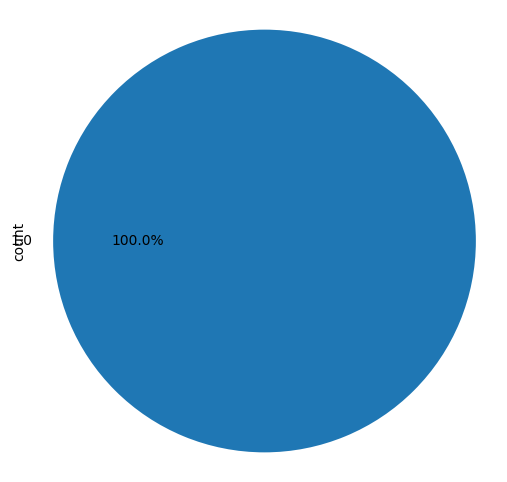

Axes(0.125,0.11;0.775x0.77)


Description : occ_2
count    4829.000000
mean        0.150342
std         0.357443
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: occ_2, dtype: float64
None
--------------------------------------------------
Count : occ_2       count  proportion
occ_2                   
0.0     4103   84.965831
1.0      726   15.034169
None
--------------------------------------------------


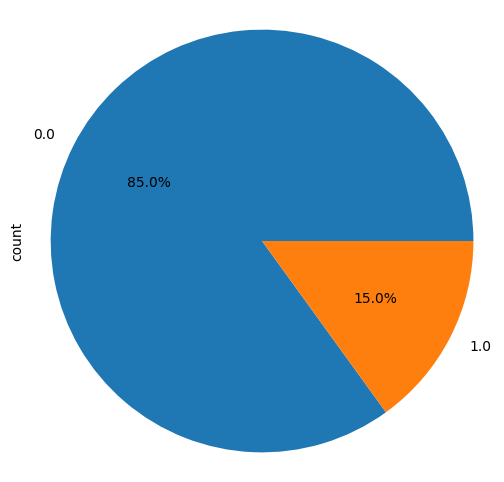

Axes(0.125,0.11;0.775x0.77)


Description : occ_3
count    4829.000000
mean        0.382067
std         0.485943
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: occ_3, dtype: float64
None
--------------------------------------------------
Count : occ_3       count  proportion
occ_3                   
0.0     2984   61.793332
1.0     1845   38.206668
None
--------------------------------------------------


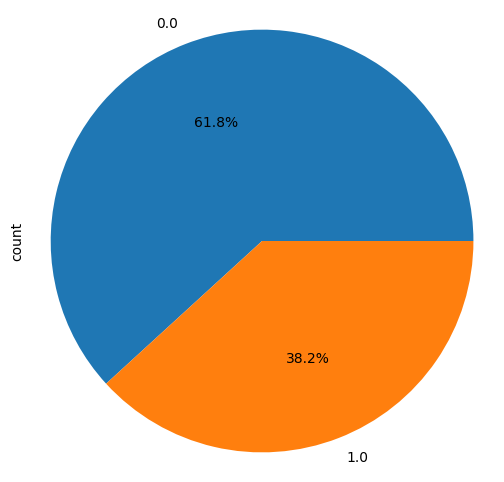

Axes(0.125,0.11;0.775x0.77)


Description : occ_4
count    4829.000000
mean        0.302340
std         0.459319
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: occ_4, dtype: float64
None
--------------------------------------------------
Count : occ_4       count  proportion
occ_4                   
0.0     3369   69.765997
1.0     1460   30.234003
None
--------------------------------------------------


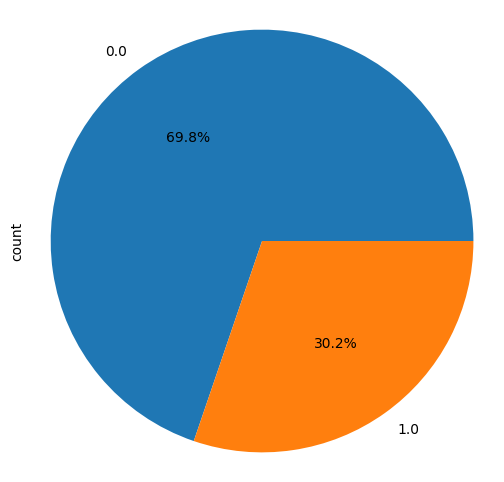

Axes(0.125,0.11;0.775x0.77)


Description : occ_5
count    4829.000000
mean        0.135432
std         0.342220
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: occ_5, dtype: float64
None
--------------------------------------------------
Count : occ_5       count  proportion
occ_5                   
0.0     4175   86.456823
1.0      654   13.543177
None
--------------------------------------------------


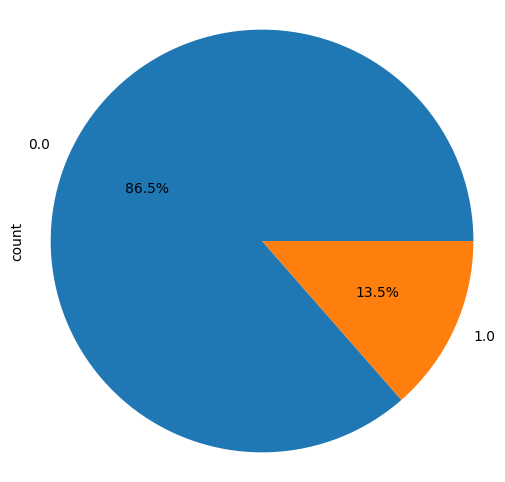

Axes(0.125,0.11;0.775x0.77)


Description : occ_6
count    4829.000000
mean        0.021951
std         0.146538
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: occ_6, dtype: float64
None
--------------------------------------------------
Count : occ_6       count  proportion
occ_6                   
0.0     4723   97.804929
1.0      106    2.195071
None
--------------------------------------------------


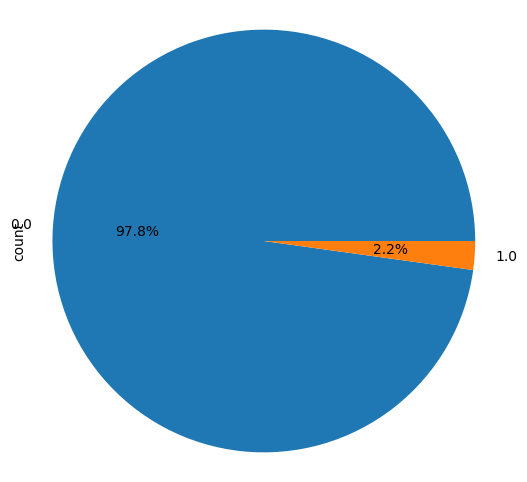

Axes(0.125,0.11;0.775x0.77)


Description : occ_husb_2
count    4829.000000
mean        0.203976
std         0.402993
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: occ_husb_2, dtype: float64
None
--------------------------------------------------
Count : occ_husb_2            count  proportion
occ_husb_2                   
0.0          3844   79.602402
1.0           985   20.397598
None
--------------------------------------------------


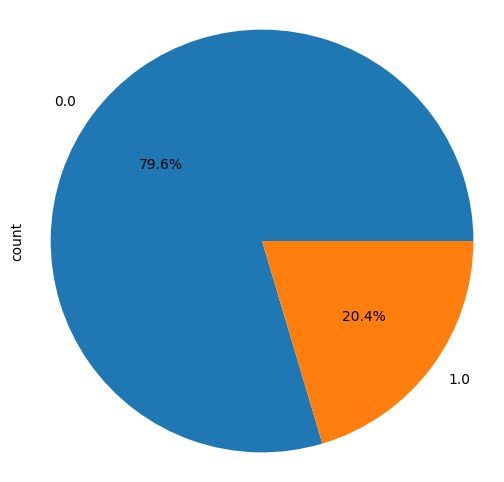

Axes(0.125,0.11;0.775x0.77)


Description : occ_husb_3
count    4829.000000
mean        0.087389
std         0.282433
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: occ_husb_3, dtype: float64
None
--------------------------------------------------
Count : occ_husb_3            count  proportion
occ_husb_3                   
0.0          4407   91.261131
1.0           422    8.738869
None
--------------------------------------------------


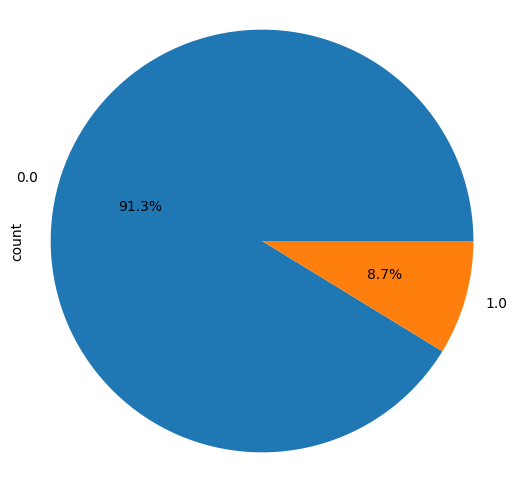

Axes(0.125,0.11;0.775x0.77)


Description : occ_husb_4
count    4829.000000
mean        0.295506
std         0.456317
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: occ_husb_4, dtype: float64
None
--------------------------------------------------
Count : occ_husb_4            count  proportion
occ_husb_4                   
0.0          3402   70.449368
1.0          1427   29.550632
None
--------------------------------------------------


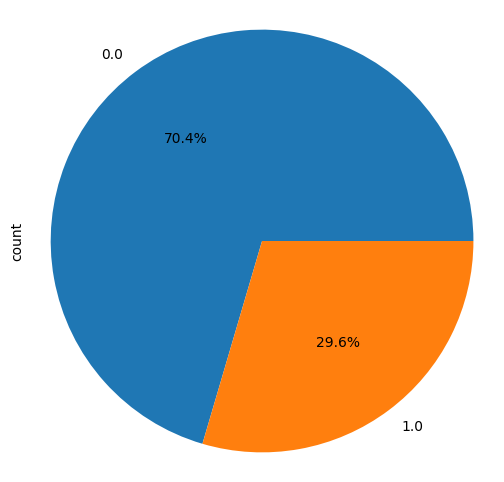

Axes(0.125,0.11;0.775x0.77)


Description : occ_husb_5
count    4829.00000
mean        0.27397
std         0.44604
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: occ_husb_5, dtype: float64
None
--------------------------------------------------
Count : occ_husb_5            count  proportion
occ_husb_5                   
0.0          3506   72.603023
1.0          1323   27.396977
None
--------------------------------------------------


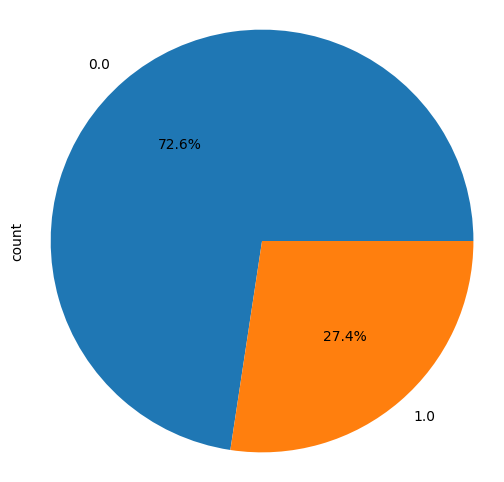

Axes(0.125,0.11;0.775x0.77)


Description : occ_husb_6
count    4829.000000
mean        0.099814
std         0.299782
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: occ_husb_6, dtype: float64
None
--------------------------------------------------
Count : occ_husb_6            count  proportion
occ_husb_6                   
0.0          4347   90.018637
1.0           482    9.981363
None
--------------------------------------------------


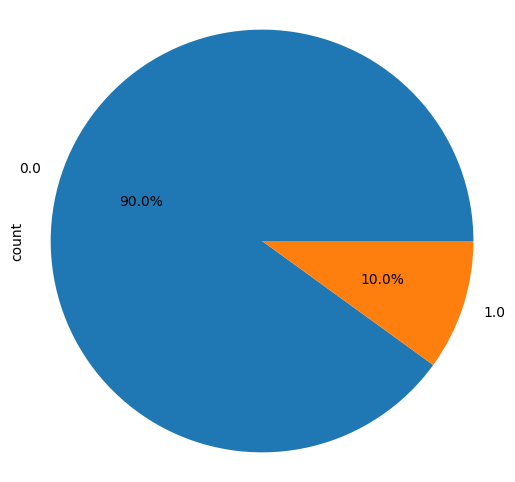

Axes(0.125,0.11;0.775x0.77)


Description : rate_marriage
count    4829.000000
mean        4.028163
std         1.011550
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rate_marriage, dtype: float64
None
--------------------------------------------------
Count : rate_marriage               count  proportion
rate_marriage                   
5.0             1921   39.780493
4.0             1644   34.044316
3.0              841   17.415614
2.0              325    6.730172
1.0               98    2.029406
None
--------------------------------------------------


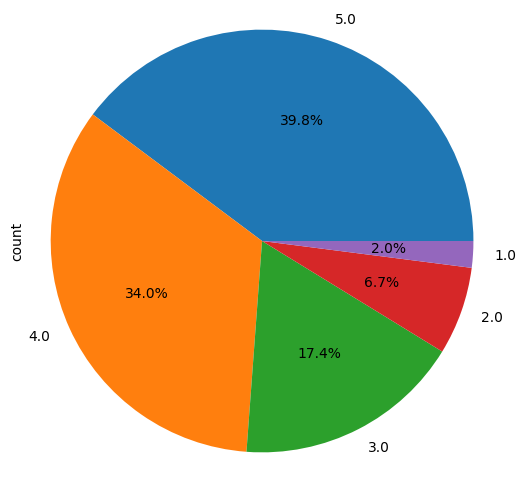

Axes(0.125,0.11;0.775x0.77)


Description : age
count    4829.000000
mean       29.966246
std         6.837806
min        17.500000
25%        27.000000
50%        27.000000
75%        37.000000
max        42.000000
Name: age, dtype: float64
None
--------------------------------------------------
Count : age      count  proportion
age                    
27.0   1488   30.813833
22.0   1024   21.205218
32.0    954   19.755643
42.0    669   13.853800
37.0    576   11.927935
17.5    118    2.443570
None
--------------------------------------------------


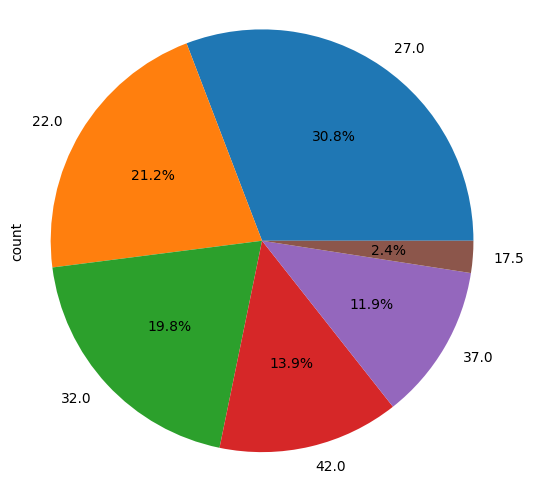

Axes(0.125,0.11;0.775x0.77)


Description : yrs_married
count    4829.000000
mean        9.879064
std         7.291870
min         0.500000
25%         2.500000
50%         9.000000
75%        16.500000
max        23.000000
Name: yrs_married, dtype: float64
None
--------------------------------------------------
Count : yrs_married             count  proportion
yrs_married                   
2.5           1197   24.787741
6.0            899   18.616691
16.5           729   15.096293
23.0           676   13.998758
13.0           530   10.975357
9.0            524   10.851108
0.5            274    5.674053
None
--------------------------------------------------


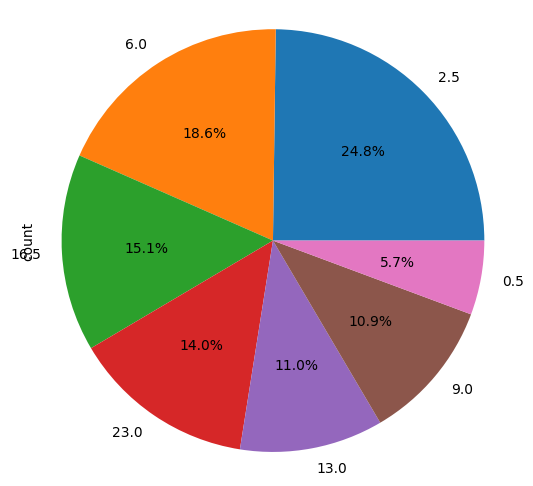

Axes(0.125,0.11;0.775x0.77)


Description : children
count    4829.000000
mean        1.576206
std         1.458410
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.500000
Name: children, dtype: float64
None
--------------------------------------------------
Count : children          count  proportion
children                   
0.0        1518   31.435080
2.0        1228   25.429696
1.0         928   19.217229
3.0         670   13.874508
4.0         300    6.212466
5.5         185    3.831021
None
--------------------------------------------------


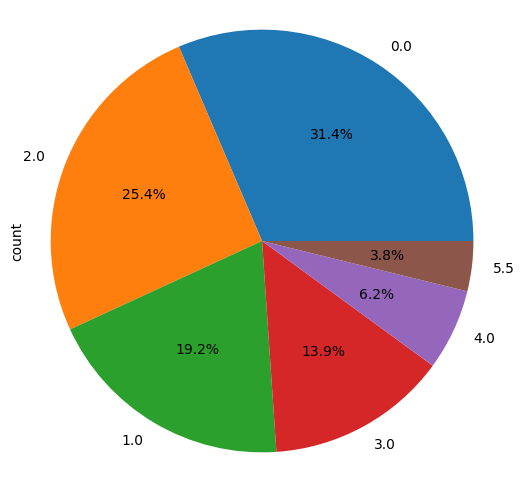

Axes(0.125,0.11;0.775x0.77)


Description : religious
count    4829.000000
mean        2.433423
std         0.915195
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: religious, dtype: float64
None
--------------------------------------------------
Count : religious           count  proportion
religious                   
3.0         1755   36.342928
2.0         1645   34.065024
1.0          840   17.394906
4.0          589   12.197142
None
--------------------------------------------------


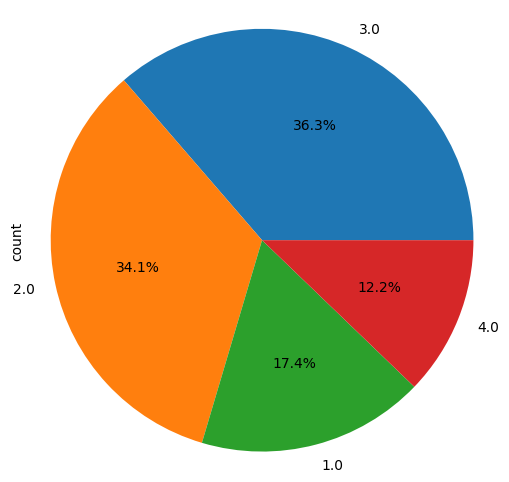

Axes(0.125,0.11;0.775x0.77)


Description : educ
count    4829.000000
mean       14.296956
std         2.281285
min         9.000000
25%        12.000000
50%        14.000000
75%        16.000000
max        20.000000
Name: educ, dtype: float64
None
--------------------------------------------------
Count : educ      count  proportion
educ                   
14.0   1650   34.168565
12.0   1560   32.304825
16.0    833   17.249948
17.0    437    9.049493
20.0    302    6.253883
9.0      47    0.973286
None
--------------------------------------------------


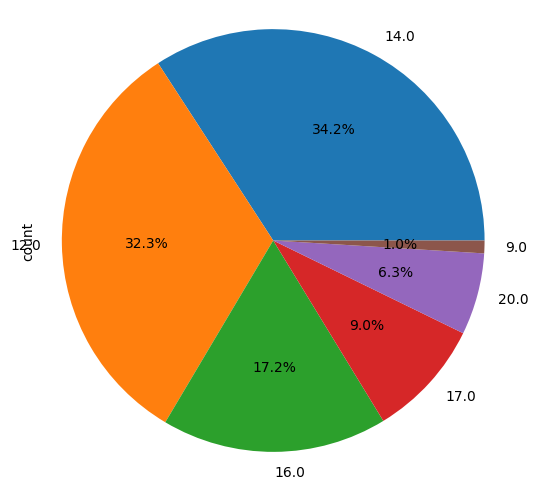

Axes(0.125,0.11;0.775x0.77)




In [194]:
for i in range (len(numerical_columns)):
    po=Information_about_single_column(X[numerical_columns[i]],numerical_columns[i])
    po.Total_Information()

<Figure size 2000x800 with 0 Axes>

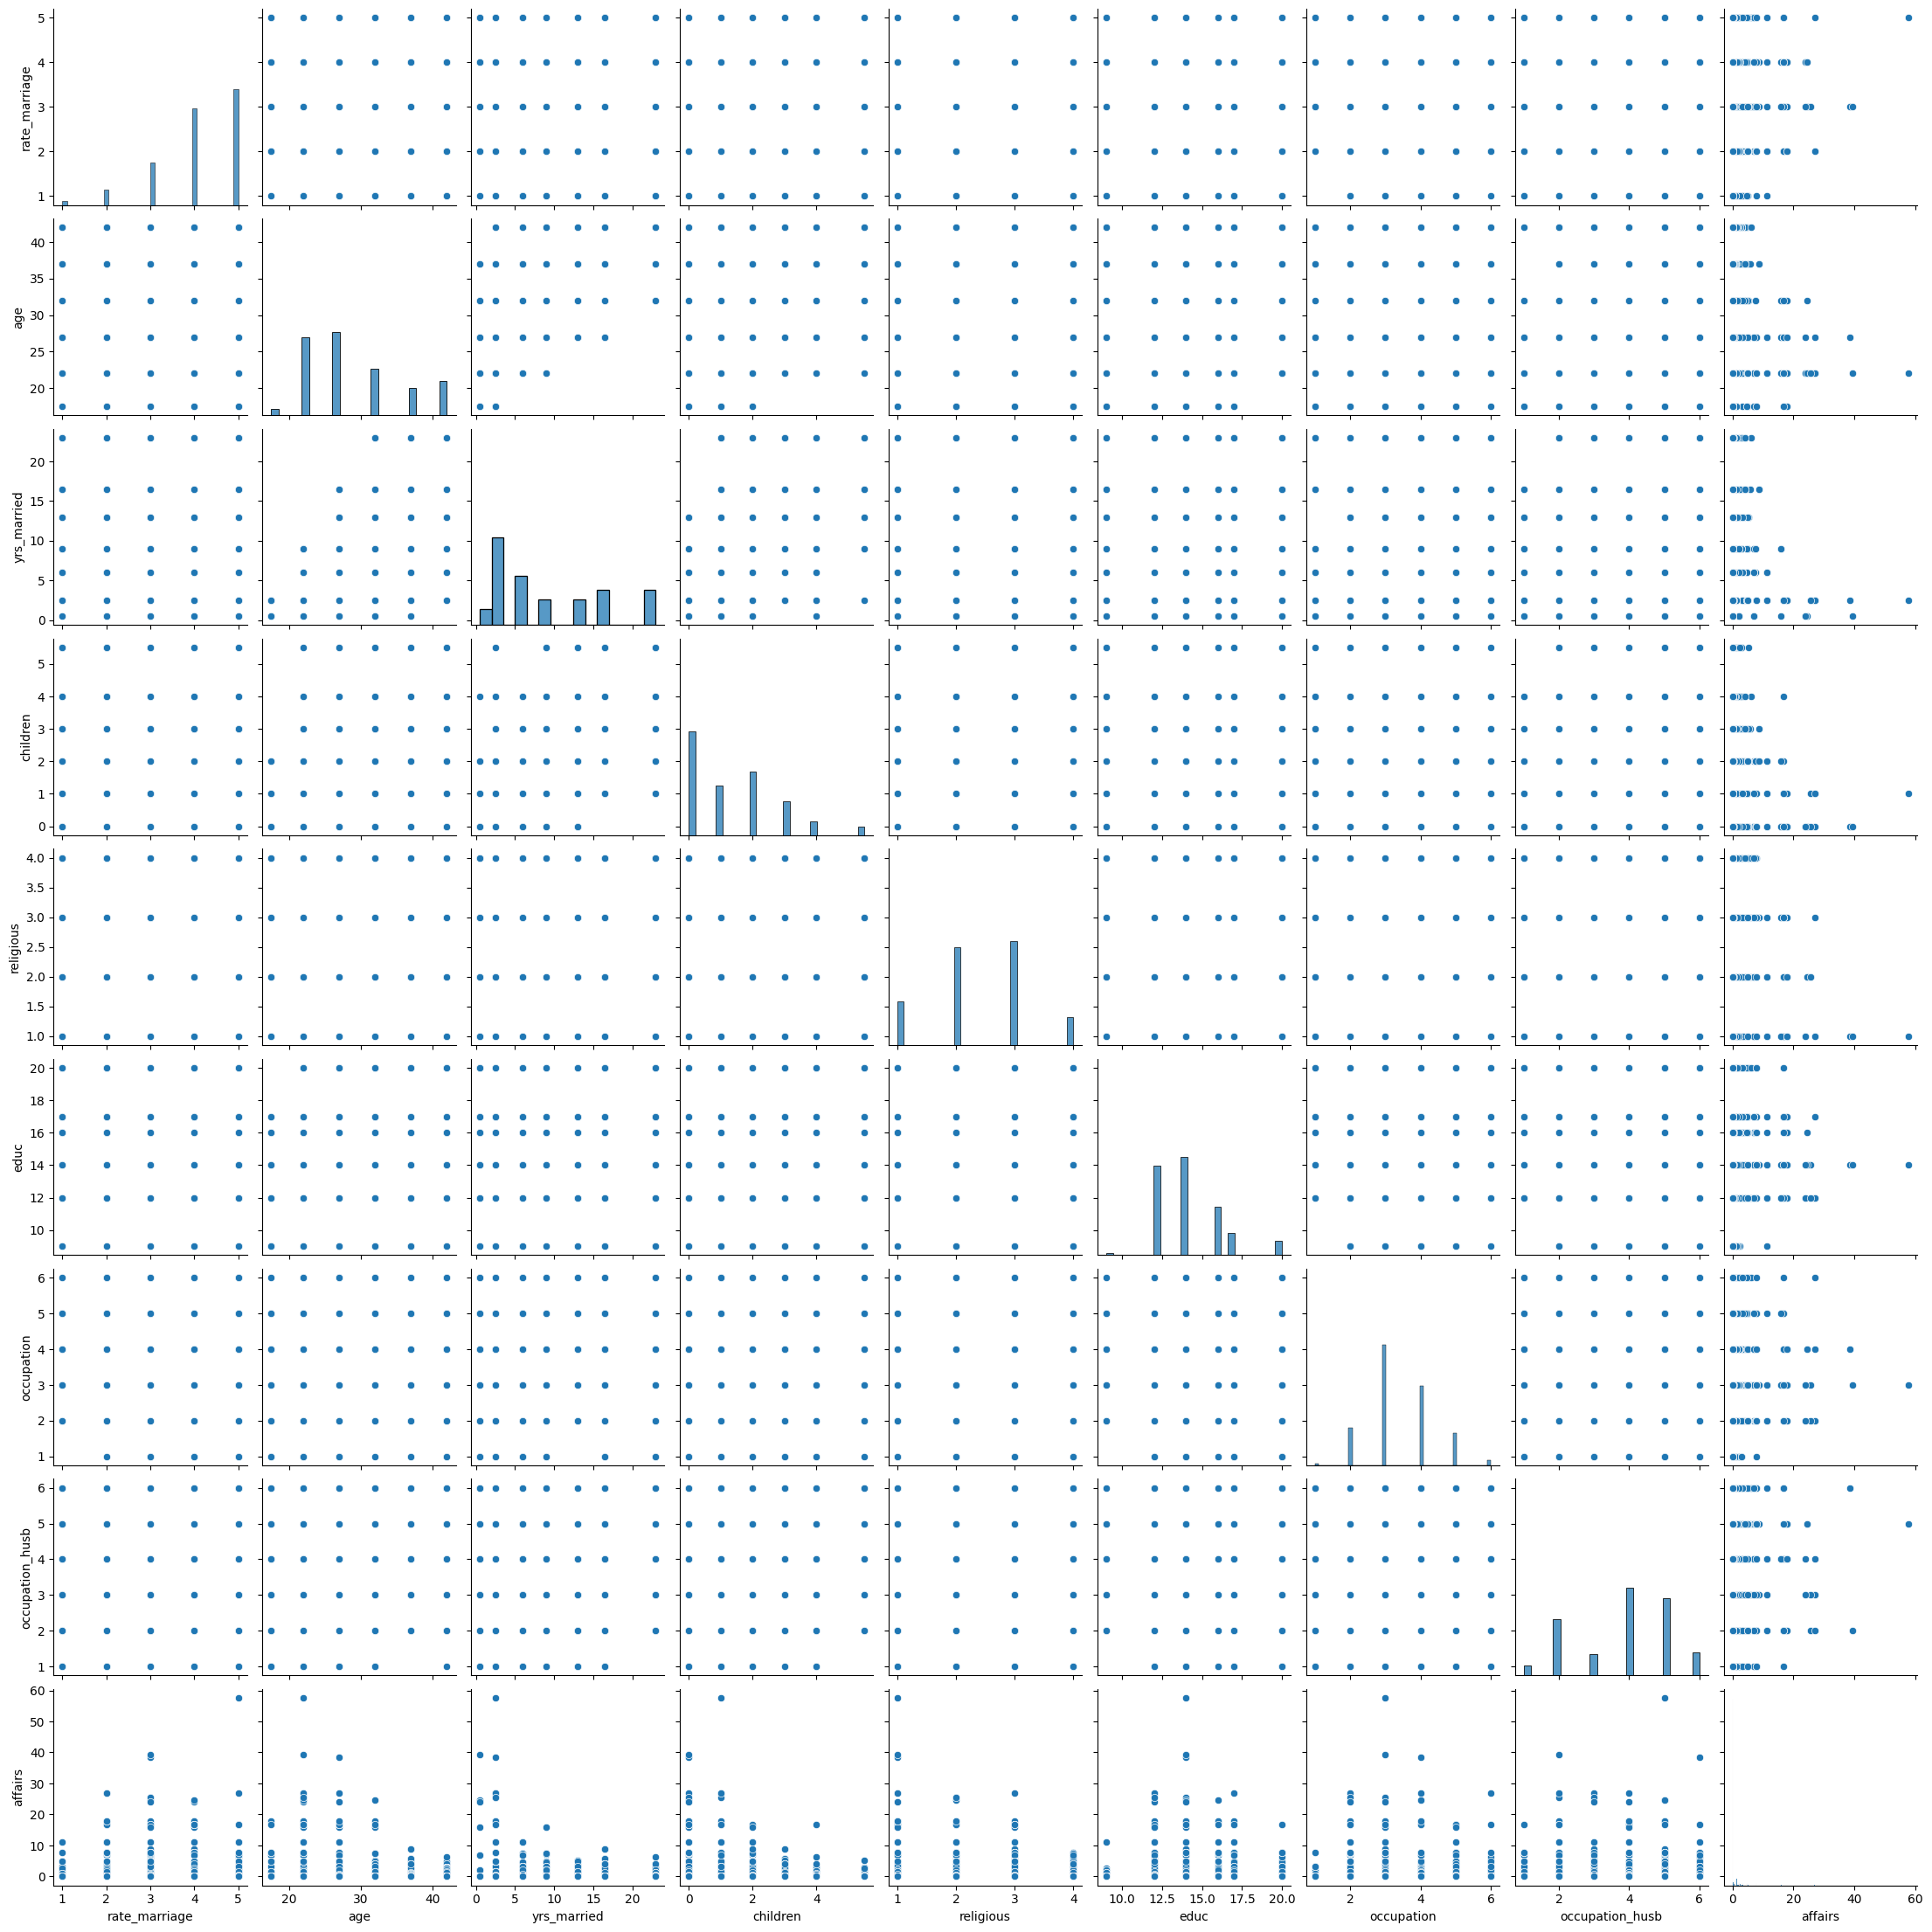

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the size of the image
plt.figure(figsize=(20, 8))

# Generate the pairplot
sns.pairplot(dta)

# Display the plot
plt.show()


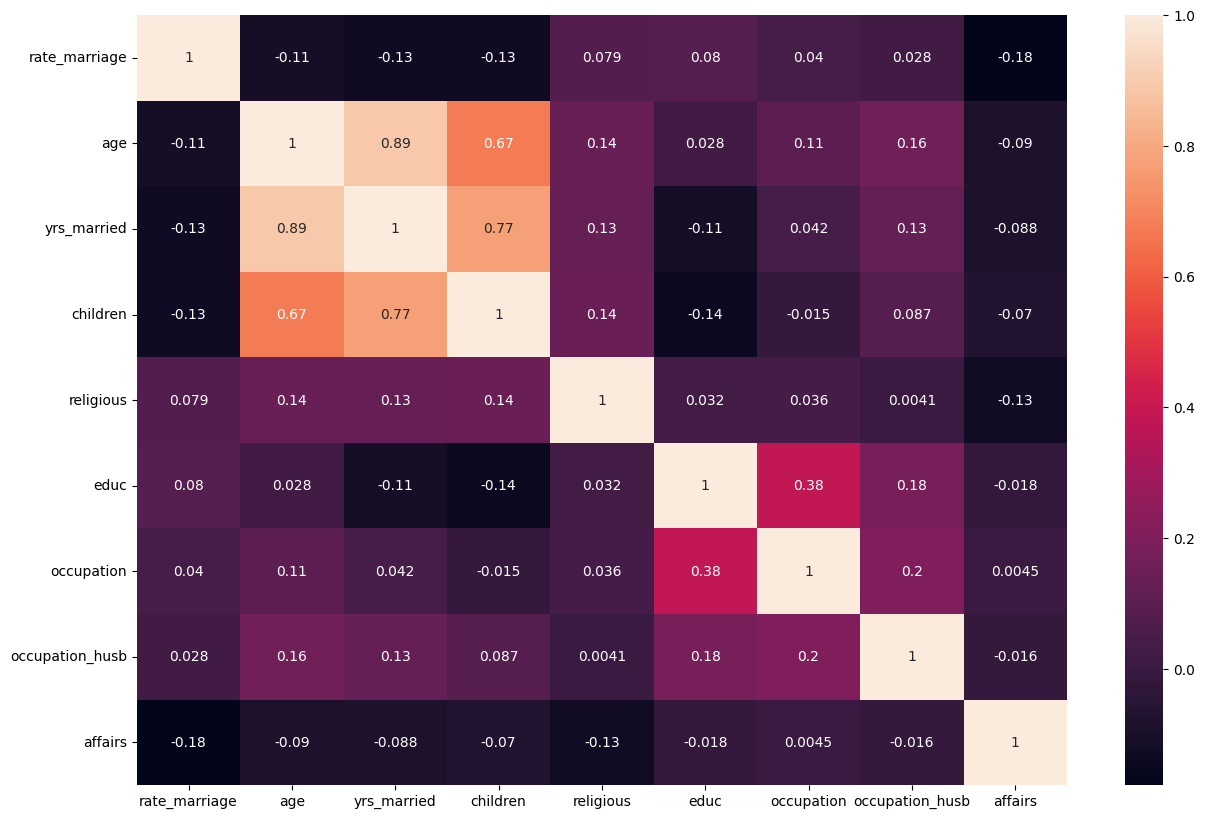

In [196]:
## correlation
# Increase the size of the image
plt.figure(figsize=(15, 10))


sns.heatmap(dta.corr(),annot=True)

# Display the plot
plt.show()




In [197]:
for i in range (len(numerical_columns)):
    print(f'{numerical_columns[i]} = ',X[numerical_columns[i]].unique(),'\n')

Intercept =  [1.] 

occ_2 =  [1. 0.] 

occ_3 =  [0. 1.] 

occ_4 =  [0. 1.] 

occ_5 =  [0. 1.] 

occ_6 =  [0. 1.] 

occ_husb_2 =  [0. 1.] 

occ_husb_3 =  [0. 1.] 

occ_husb_4 =  [0. 1.] 

occ_husb_5 =  [1. 0.] 

occ_husb_6 =  [0. 1.] 

rate_marriage =  [3. 4. 5. 2. 1.] 

age =  [32.  27.  22.  37.  42.  17.5] 

yrs_married =  [ 9.  13.   2.5 16.5 23.   6.   0.5] 

children =  [3.  0.  4.  1.  5.5 2. ] 

religious =  [3. 1. 2. 4.] 

educ =  [17. 14. 16. 12. 20.  9.] 



In [198]:
df['occupation_husb'].unique()

array([5., 4., 3., 2., 6., 1.])

In [199]:
X['religious'].unique()

array([3., 1., 2., 4.])